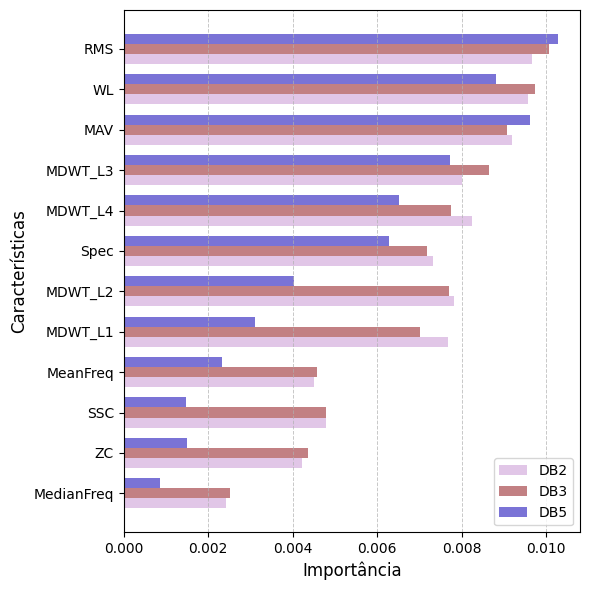

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_path_1 = r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\FI_Results_New_DB2_5_9FEATS\RandomForest\feature_importances.csv"
csv_path_2 = r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\FI_Results_New_DB3_5_9FEATS\RandomForest\feature_importances.csv"
csv_path_3 = r"C:\Users\PC\Desktop\TCC_2025\App\Models\DB3\DB5_Results_New_DB5_5_9FEATS\RandomForest\feature_importances.csv"

def process_feature_importance(csv_path):
    df = pd.read_csv(csv_path)
    df['FeatureType'] = df['Feature'].apply(lambda x: x.split('_', 1)[1])
    grouped_mean = df.groupby('FeatureType')['Importance'].mean().reset_index()
    return grouped_mean

feature_grouped_1 = process_feature_importance(csv_path_1)
feature_grouped_2 = process_feature_importance(csv_path_2)
feature_grouped_3 = process_feature_importance(csv_path_3)

merged_df = pd.merge(feature_grouped_1, feature_grouped_2, on='FeatureType', how='outer', suffixes=('_DB2', '_DB3'))
merged_df = pd.merge(merged_df, feature_grouped_3, on='FeatureType', how='outer')
merged_df = merged_df.rename(columns={'Importance': 'Importance_DB5'}).fillna(0)

merged_df['TotalImportance'] = merged_df['Importance_DB2'] + merged_df['Importance_DB3'] + merged_df['Importance_DB5']
merged_df = merged_df.sort_values(by='TotalImportance', ascending=True)

x = np.arange(len(merged_df['FeatureType']))
width = 0.25


colors = ['#E1C6E7', '#c28083', "#7a73d6"]  # DB2, DB3, DB5


plt.style.use('seaborn-v0_8-muted')
fig, ax = plt.subplots(figsize=(6, 6))

ax.barh(x - width, merged_df['Importance_DB2'], height=width, label='DB2', color=colors[0])
ax.barh(x,         merged_df['Importance_DB3'], height=width, label='DB3', color=colors[1])
ax.barh(x + width, merged_df['Importance_DB5'], height=width, label='DB5', color=colors[2])

ax.set_yticks(x)
ax.set_yticklabels(merged_df['FeatureType'])
ax.set_xlabel('Importância', fontsize=12)
ax.set_ylabel('Características', fontsize=12)
ax.legend()
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.savefig("feature_importance_5g9f.pdf", format="pdf")
plt.show()
